In [9]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [10]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [11]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [12]:
filtered_butter = final_df[final_df['Step'].str.strip() == 'Add butter']
filtered_butter = filtered_butter[filtered_butter['Participant'] != 'C011']
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
3,C002,28,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839
14,C004,30,Add butter,131.913954,220.883048,297.924372,242.485275,389.657921,354.535972,118.391897,193.819130
25,C005,46,Add butter,144.152977,201.578498,361.997470,271.998446,455.801352,425.674955,706.680071,236.430900
36,C010,54,Add butter,107.651726,138.543294,285.250598,209.287920,413.009446,134.522255,126.195299,112.447679
49,C014,32,Add butter,465.928089,595.513026,512.944117,492.948570,626.155193,1372.302924,1020.634290,780.666999
60,C015,33,Add butter,99.397880,116.957918,143.628001,123.477562,184.418438,369.580931,286.690272,186.378962
71,C018,50,Add butter,123.371122,221.941791,308.163571,236.663478,399.961616,299.740678,203.773024,169.807244
82,C019,40,Add butter,0.000000,102.319814,0.000000,64.844725,358.636328,0.000000,241.756197,160.074396
93,C022,32,Add butter,550.278136,778.272907,927.453746,802.883420,1046.135840,1775.603941,1238.104785,968.315960
104,C023,52,Add butter,154.653961,219.788516,196.411781,185.870785,196.642141,640.698442,437.480695,158.337560


In [13]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_butter = filtered_butter.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_butter.select_dtypes(include=['float64', 'int64']).columns
filtered_butter[numerical_cols] = filtered_butter[numerical_cols].replace(0, np.nan)

filtered_butter[numerical_cols] = imputer.fit_transform(filtered_butter[numerical_cols])
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
3,C002,28.0,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839
14,C004,30.0,Add butter,131.913954,220.883048,297.924372,242.485275,389.657921,354.535972,118.391897,193.819130
25,C005,46.0,Add butter,144.152977,201.578498,361.997470,271.998446,455.801352,425.674955,706.680071,236.430900
36,C010,54.0,Add butter,107.651726,138.543294,285.250598,209.287920,413.009446,134.522255,126.195299,112.447679
49,C014,32.0,Add butter,465.928089,595.513026,512.944117,492.948570,626.155193,1372.302924,1020.634290,780.666999
60,C015,33.0,Add butter,99.397880,116.957918,143.628001,123.477562,184.418438,369.580931,286.690272,186.378962
71,C018,50.0,Add butter,123.371122,221.941791,308.163571,236.663478,399.961616,299.740678,203.773024,169.807244
82,C019,40.0,Add butter,99.397880,102.319814,143.628001,64.844725,358.636328,369.580931,241.756197,160.074396
93,C022,32.0,Add butter,550.278136,778.272907,927.453746,802.883420,1046.135840,1775.603941,1238.104785,968.315960
104,C023,52.0,Add butter,154.653961,219.788516,196.411781,185.870785,196.642141,640.698442,437.480695,158.337560


In [14]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Butter',
    'HeadCamera Distance': 'HeadCamera Distance - Add Butter',
    'LeftElbow Distance': 'LeftElbow Distance - Add Butter',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Butter',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Butter',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Butter',
    'RightElbow Distance': 'RightElbow Distance - Add Butter',
    'RightShoulder Distance': 'RightShoulder Distance - Add Butter'
}

# Rename columns
filtered_butter = filtered_butter.rename(columns=new_column_names)
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance - Add Butter,HeadCamera Distance - Add Butter,LeftElbow Distance - Add Butter,LeftShoulder Distance - Add Butter,MotionControllerLeft Distance - Add Butter,MotionControllerRight Distance - Add Butter,RightElbow Distance - Add Butter,RightShoulder Distance - Add Butter
3,C002,28.0,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839
14,C004,30.0,Add butter,131.913954,220.883048,297.924372,242.485275,389.657921,354.535972,118.391897,193.819130
25,C005,46.0,Add butter,144.152977,201.578498,361.997470,271.998446,455.801352,425.674955,706.680071,236.430900
36,C010,54.0,Add butter,107.651726,138.543294,285.250598,209.287920,413.009446,134.522255,126.195299,112.447679
49,C014,32.0,Add butter,465.928089,595.513026,512.944117,492.948570,626.155193,1372.302924,1020.634290,780.666999
60,C015,33.0,Add butter,99.397880,116.957918,143.628001,123.477562,184.418438,369.580931,286.690272,186.378962
71,C018,50.0,Add butter,123.371122,221.941791,308.163571,236.663478,399.961616,299.740678,203.773024,169.807244
82,C019,40.0,Add butter,99.397880,102.319814,143.628001,64.844725,358.636328,369.580931,241.756197,160.074396
93,C022,32.0,Add butter,550.278136,778.272907,927.453746,802.883420,1046.135840,1775.603941,1238.104785,968.315960
104,C023,52.0,Add butter,154.653961,219.788516,196.411781,185.870785,196.642141,640.698442,437.480695,158.337560


In [15]:
tracker_columns = ['Chest Distance - Add Butter', 'HeadCamera Distance - Add Butter', 'LeftElbow Distance - Add Butter', 'LeftShoulder Distance - Add Butter',
                   'RightElbow Distance - Add Butter', 'RightShoulder Distance - Add Butter', 'MotionControllerLeft Distance - Add Butter',
                   'MotionControllerRight Distance - Add Butter']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_butter, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_butter[block_design_col], filtered_butter[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_butter, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Butter,-0.244199,0.400141
1,HeadCamera Distance - Add Butter,-0.204846,0.482361
2,LeftElbow Distance - Add Butter,-0.080485,0.784458
3,LeftShoulder Distance - Add Butter,-0.193833,0.506702
4,RightElbow Distance - Add Butter,-0.275331,0.340723
5,RightShoulder Distance - Add Butter,-0.557270,0.038424
6,MotionControllerLeft Distance - Add Butter,-0.096917,0.741705
7,MotionControllerRight Distance - Add Butter,-0.234840,0.418995


In [16]:
#filtered_butter.to_csv('SimplePie_AddButter.csv',index=False)

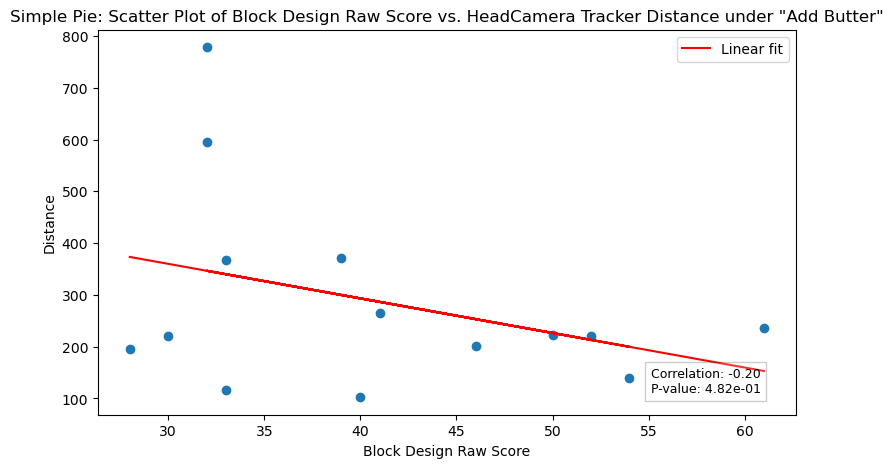

In [17]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '17 SP_ButterDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

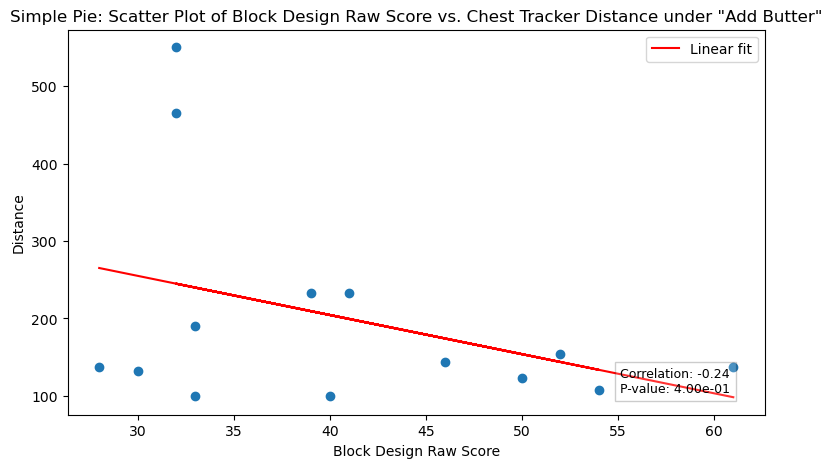

In [18]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '18 SP_ButterDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

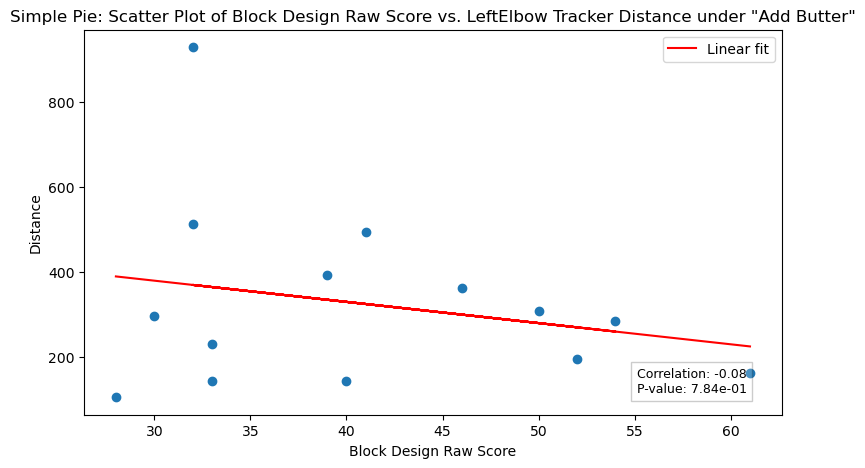

In [19]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '19 SP_ButterDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

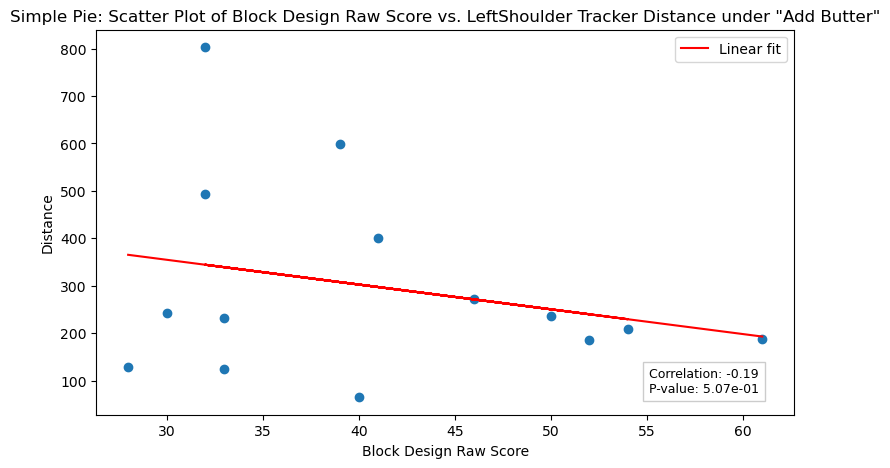

In [20]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '20 SP_ButterDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

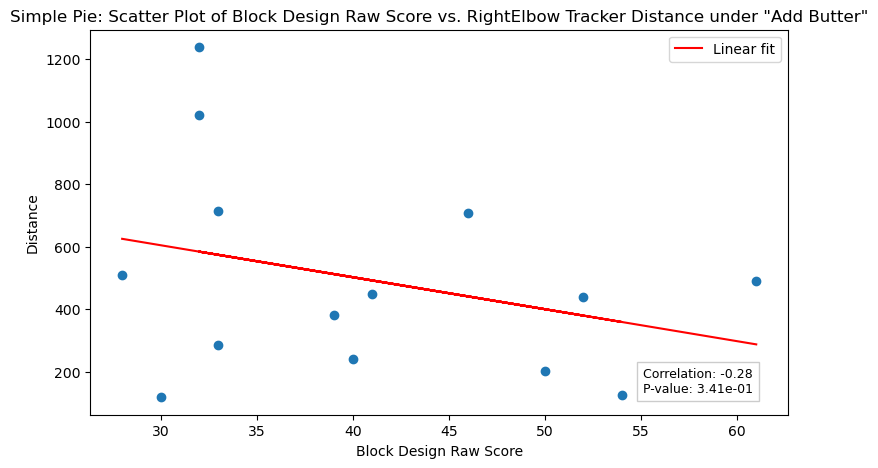

In [21]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '21 SP_ButterDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

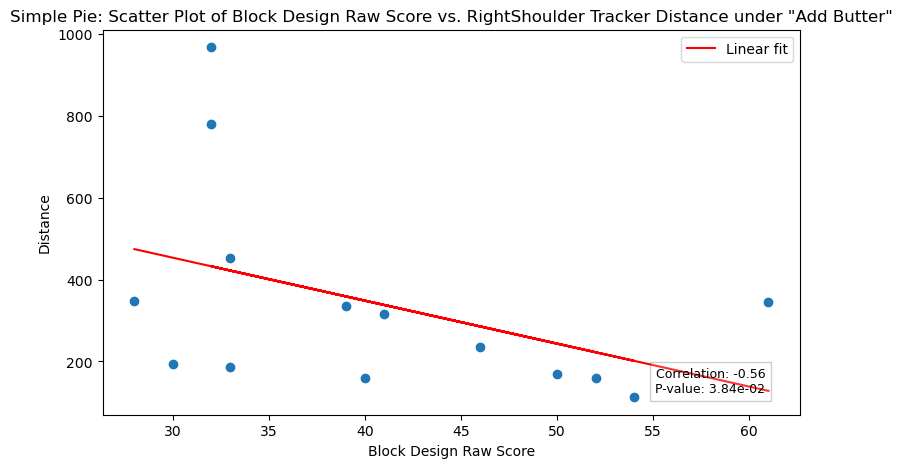

In [22]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '22 SP_ButterDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

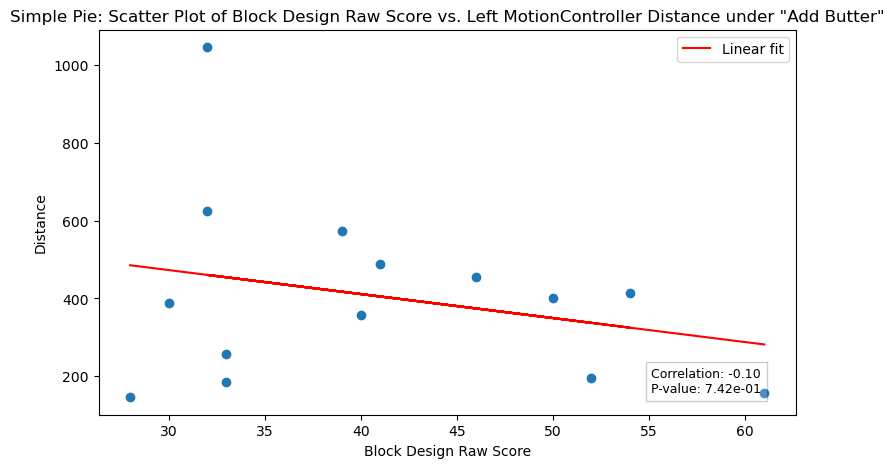

In [23]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '23 SP_ButterDistanceLeftController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

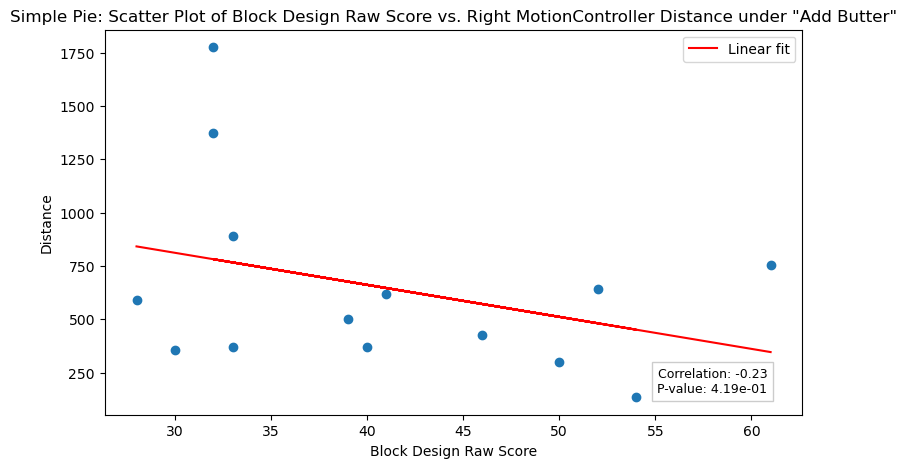

In [24]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '24 SP_ButterDistanceRightController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()